In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./data/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Conjunto de prueba
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

# Conjunto de entrenamiento
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. # X_train.reshape(X_train.shape[0],WIDTH*HEIGHT).T
_,m_train = X_train.shape

In [4]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2

def relu(z):
    return np.maximum(z, 0)

def softmax(z):
    return np.exp(z) / np.sum(z)

def forward_prop(x, w1, b1, w2, b2):
    z1 = w1.dot(x) + b1 # (10, m)
    a1 = relu(z1) # (10, m)
    z2 = w2.dot(a1) + b2 # (10, m)
    a2 = softmax(z2) # (10, m)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.max()+1,y.size))
    one_hot_y[y,np.arange(y.size)] = 1
    return one_hot_y

def deriv_relu(z):
    return z>0

def back_prop(x, y, z1, a1, z2, a2, w2):
    m = y.size
    one_hot_y = one_hot(y)
    dz2 = 2 * (a2 - one_hot_y) # (10, m)
    dw2 = 1 / m * dz2.dot(a1.T) # (10, 10)
    db2 = 1 / m * np.sum(dz2) # (10, 1)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1) # (10, m)
    dw1 = 1 / m * dz1.dot(x.T) # (10, 784)
    db1 = 1 / m * np.sum(dz1) # (10, 1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db2, dw2, db1, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2


In [5]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(x, w1, b1, w2, b2)
        dw1, db1, dw2, db2 = back_prop(x, y, z1, a1, z2, a2, w2)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db2, dw2, db1, alpha)
        if i % 10 == 0:
            print(f'Iteration: {i}')
            print(f'Accuracy: {get_accuracy(get_predictions(a2), y)}')
    return w1, b1, w2, b2

In [6]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 0.05, 1000)

Iteration: 0
[1 5 4 ... 7 4 4] [7 8 3 ... 7 3 4]
Accuracy: 0.07085365853658536
Iteration: 10
[9 9 2 ... 8 8 2] [7 8 3 ... 7 3 4]
Accuracy: 0.24148780487804877
Iteration: 20
[7 1 5 ... 1 8 6] [7 8 3 ... 7 3 4]
Accuracy: 0.3362439024390244
Iteration: 30
[4 1 1 ... 1 8 2] [7 8 3 ... 7 3 4]
Accuracy: 0.2889512195121951
Iteration: 40
[3 3 3 ... 1 3 2] [7 8 3 ... 7 3 4]
Accuracy: 0.3470243902439024
Iteration: 50
[6 5 5 ... 9 5 6] [7 8 3 ... 7 3 4]
Accuracy: 0.43353658536585366
Iteration: 60
[4 2 5 ... 9 3 6] [7 8 3 ... 7 3 4]
Accuracy: 0.5654878048780487
Iteration: 70
[6 2 5 ... 7 0 6] [7 8 3 ... 7 3 4]
Accuracy: 0.5156585365853659
Iteration: 80
[6 2 5 ... 9 0 6] [7 8 3 ... 7 3 4]
Accuracy: 0.5338536585365854
Iteration: 90
[7 2 5 ... 9 3 6] [7 8 3 ... 7 3 4]
Accuracy: 0.47192682926829266
Iteration: 100
[6 2 5 ... 9 8 6] [7 8 3 ... 7 3 4]
Accuracy: 0.5231951219512195
Iteration: 110
[6 2 5 ... 9 8 6] [7 8 3 ... 7 3 4]
Accuracy: 0.615
Iteration: 120
[7 2 5 ... 9 3 6] [7 8 3 ... 7 3 4]
Accuracy:

In [7]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, A2 = forward_prop(x, w1, b1, w2, b2)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(image, label, w1, b1, w2, b2):
    current_image = image
    prediction = make_predictions(image, w1, b1, w2, b2)
    label = label
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


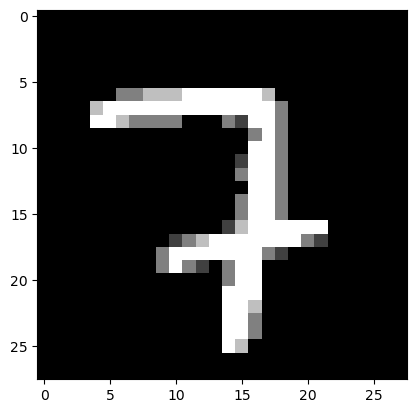

Prediction:  [8]
Label:  8


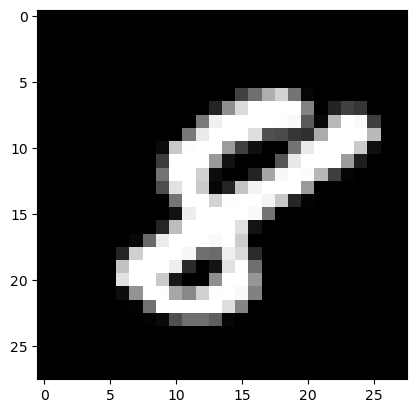

Prediction:  [3]
Label:  3


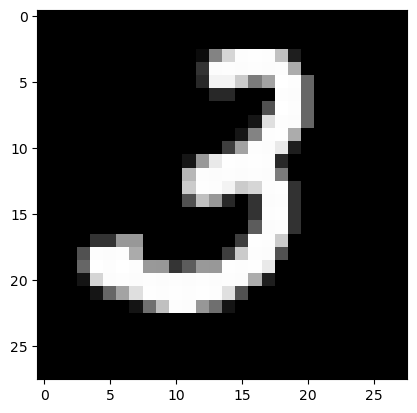

Prediction:  [8]
Label:  8


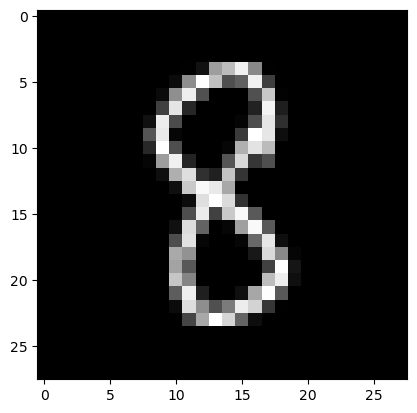

In [8]:
test_prediction(X_train[:, 0, None], Y_train[0], w1, b1, w2, b2)
test_prediction(X_train[:, 1, None], Y_train[1], w1, b1, w2, b2)
test_prediction(X_train[:, 2, None], Y_train[2], w1, b1, w2, b2)
test_prediction(X_train[:, 3, None], Y_train[3], w1, b1, w2, b2)

In [10]:
dev_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_test)

[7 8 2 6 3 5 4 9 4 4 6 7 4 6 5 8 5 8 2 5 9 4 3 0 7 5 0 0 1 7 6 5 9 5 8 2 3
 8 9 6 8 1 5 6 2 9 7 9 2 3 8 3 7 3 2 6 4 5 0 3 2 5 5 1 5 0 9 8 3 8 1 9 8 3
 0 7 5 2 7 6 0 0 4 2 0 0 9 8 7 1 7 5 3 2 4 1 1 1 7 6 5 5 8 1 0 0 6 9 3 5 9
 9 8 2 0 0 7 7 0 1 6 5 8 4 9 9 0 7 3 6 1 7 0 2 1 2 1 3 0 1 3 0 1 4 8 0 3 4
 8 1 4 4 8 1 5 4 7 5 2 2 8 1 1 4 8 1 7 7 8 5 5 1 2 9 5 7 7 7 7 4 8 2 4 0 2
 0 8 0 0 6 1 5 8 2 3 8 0 7 9 4 2 9 8 4 7 6 7 3 4 6 4 3 6 1 3 8 0 7 2 4 5 8
 5 0 4 0 7 9 3 9 5 3 3 1 6 0 4 0 3 9 6 5 7 1 2 5 7 2 6 8 2 0 1 1 0 2 2 6 4
 6 9 9 9 0 7 1 5 3 3 5 0 1 4 4 9 4 7 3 7 2 7 5 4 1 1 6 2 2 6 1 4 7 7 6 4 0
 5 2 0 0 9 7 9 2 4 4 4 3 5 9 6 2 3 1 8 6 8 7 8 8 2 7 8 3 3 3 5 2 6 3 7 2 8
 9 7 8 9 8 6 9 6 8 8 2 1 0 6 4 8 1 1 8 5 3 8 4 3 1 3 8 9 1 4 2 8 2 6 1 6 1
 3 8 1 2 5 7 5 8 1 0 3 3 3 8 1 0 3 7 7 5 7 4 1 8 2 5 5 8 8 9 6 8 8 6 0 3 9
 1 4 3 4 9 1 8 1 4 8 9 6 5 9 1 3 9 1 1 3 9 8 7 2 3 8 5 6 2 6 2 3 9 0 5 4 1
 3 6 9 7 0 2 6 8 9 9 8 5 9 9 8 5 3 7 7 9 8 4 9 4 8 4 0 7 1 8 7 0 8 2 3 3 2
 7 4 0 8 6 2 1 7 2 4 8 0 

0.85